In [1]:
!pip install MTCNN

     |████████████████████████████████| 2.3 MB 5.1 MB/s 


In [2]:
!pip install keras_vggface
!pip install keras_applications

     |████████████████████████████████| 50 kB 2.8 MB/s 


In [3]:
import numpy as np

import matplotlib.pyplot as plt

from cv2 import cv2

import tensorflow as tf

from tensorflow import keras

from mtcnn.mtcnn import MTCNN

from scipy.spatial.distance import cosine

import urllib.request

import requests

import threading

import random
from keras import backend as K

In [9]:
def leaf_det(img):
  a = img.shape
  img = img
  img = cv2.cvtColor(img,cv2.COLOR_BGR2HSV)
  lower_blue = np.array([30,100,100])#for green
  higher_blue = np.array([80,255,255])
  mask = cv2.inRange(img,lower_blue,higher_blue)

  unique, counts = np.unique(mask, return_counts=True)
  a=dict(zip(unique,counts))
  plt.imshow(mask)
  #figure()
  plt.imshow(img)
  if(int(a[255])>=np.size(mask)/4):
      print("leaf is green")
      return 1
  else:
      print("leaf is not green")
      return 0

In [5]:
from IPython.display import display,Javascript
from google.colab.output import eval_js
from base64 import b64decode
def take_photo(filename='photo.jpg',quality=0.8):
  js = Javascript('''
  async function takePhoto(quality){
    const div = document.createElement('div');
    const capture = document.createElement('button');
    capture.textContent = 'Capture';
    div.appendChild(capture);

    const video = document.createElement('video');
    video.style.display = 'block';
    const stream = await navigator.mediaDevices.getUserMedia({video:true})

    document.body.appendChild(div);
    div.appendChild(video);
    video.srcObject = stream;
    await video.play();

    google.colab.output.setIframeHeight(document.documentElement.scrollHeight,true);

    await new Promise((resolve) => capture.onclick=resolve); 
    const canvas= document.createElement('canvas');
    canvas.width=video.videoWidth;
    canvas.height=video.videoHeight;
    canvas.getContext('2d').drawImage(video,0,0);
    stream.getVideoTracks()[0].stop();
    div.remove();
    return canvas.toDataURL('image/jpeg',quality);
  }
  ''')
  display(js)
  data=eval_js('takePhoto({})'.format(quality))
  binary=b64decode(data.split(',')[1])
  with open(filename,'wb') as f:
    f.write(binary)
  return filename

In [6]:
def thingspeak_post(valm):
  #threading.Timer(15,thingspeak_post).start()
  val ="x"+valm
  URl='https://api.thingspeak.com/update?api_key='
  KEY='KXCD7ECW1QTIT3W4'
  HEADER='&field1={}'.format(val)
  NEW_URL = URl+KEY+HEADER
  print(NEW_URL)
  data=urllib.request.urlopen(NEW_URL)
  print(data)

def scan():
      filename =take_photo()
      print('Saved to {}'.format(filename))
      img = plt.imread("/content/photo.jpg")
      score = leaf_det(img)
      if(score==1):
        print("leaf is green")
        k="y"
        thingspeak_post(k)
      elif(score==0):
        print("leaf is yellow")
        k="n"
        thingspeak_post(k)

<IPython.core.display.Javascript object>

Saved to photo.jpg
leaf is not green
leaf is yellow
https://api.thingspeak.com/update?api_key=KXCD7ECW1QTIT3W4&field1=xn


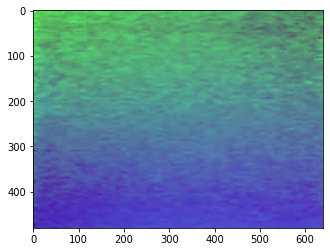

In [16]:
scan()